In [8]:
# Move up a directory (until the root of the git repo),
# but only if this has not been done before.
if 'in_correct_dir' not in locals():
    %cd -q ..
in_correct_dir = True
%pwd

'/home/wout/pp/code'

In [9]:
import io
import json
from pathlib import Path

import ipywidgets as W
from PIL import Image
from IPython.display import display

import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [48]:
# df = pd.read_csv("artifacts/results/mnist_default_k10_e5.csv")
# df = pd.read_csv("artifacts/results/mnist_default_k5_e10.csv")
# df = pd.read_csv("artifacts/results/cifar10_default_k5_e10.csv")
# df = pd.read_csv("artifacts/results/segment_default_k5_e20.csv")
# df = pd.read_csv("artifacts/results/segment_default_k5_r5_e20.csv")
# df = pd.read_csv("artifacts/results/segment_default_k5_r1_weighted.csv")
df = pd.read_csv("artifacts/results/segment_default_k5_r5_weighted.csv")
# df = pd.read_csv("results.csv")
df.syst_prediction = df.syst_prediction.map(lambda s: np.array(json.loads(s)))
df.asss_prediction = df.asss_prediction.map(lambda s: np.array(json.loads(s)))
display(df.dtypes)
display(df.head(10))
display(df.describe())

inst_index           int64
inst_target          int64
syst_features       object
syst_prediction     object
syst_pred_loss     float64
syst_pred_score    float64
asss_prediction     object
asss_pred_loss       int64
dtype: object

,inst_index,inst_target,syst_features,syst_prediction,syst_pred_loss,syst_pred_score,asss_prediction,asss_pred_loss
0,0,4,[4],"[[6.81142808822699e-10, 0.01239688415080309, 2...",0.012475,1.0,[0.7592752575874329],0
1,0,4,[4],"[[1.2766386559004417e-10, 0.09182378649711609,...",0.101002,1.0,[0.7592752575874329],0
2,0,4,[4],"[[3.830549633455742e-14, 0.0005971959908492863...",0.001055,1.0,[0.7592752575874329],0
3,0,4,[4],"[[4.22368851005217e-09, 0.0018522897735238075,...",0.002388,1.0,[0.7592752575874329],0
4,0,4,[4],"[[1.518020022589145e-16, 0.004120063502341509,...",0.004132,1.0,[0.7592752575874329],0
5,1,2,[4],"[[7.392656698357314e-05, 0.0018681230721995234...",0.156121,1.0,[0.11336731165647507],2
6,1,2,[4],"[[0.005315868649631739, 0.007422212045639753, ...",0.370341,1.0,[0.11336731165647507],2
7,1,2,[4],"[[0.00018819149408955127, 0.001296567381359636...",0.095819,1.0,[0.11336731165647507],2
8,1,2,[4],"[[0.001580271404236555, 0.0004312949604354799,...",0.159985,1.0,[0.11336731165647507],2
9,1,2,[4],"[[0.0002635199634823948, 0.0006588430260308087...",0.184906,1.0,[0.11336731165647507],2


,inst_index,inst_target,syst_pred_loss,syst_pred_score,asss_pred_loss
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,230.500000,3.086580,0.160909,0.938528,0.198268
std,133.396477,2.014745,0.618795,0.240246,0.655190
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,1.000000,0.000166,1.000000,0.000000
50%,230.500000,3.000000,0.001533,1.000000,0.000000
75%,346.000000,5.000000,0.017058,1.000000,0.000000
max,461.000000,6.000000,10.758070,1.000000,5.000000


In [49]:
from sklearn.metrics import classification_report
print(f"Num base mispredictions {(df.syst_pred_score == 0).sum() }")
print(classification_report(df.inst_target, df.syst_prediction.map(lambda p: np.argmax(p, axis=1)[0])))

Num base mispredictions 142
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       325
           1       0.93      0.94      0.94       305
           2       0.81      0.87      0.84       305
           3       1.00      0.99      0.99       335
           4       1.00      1.00      1.00       365
           5       1.00      1.00      1.00       300
           6       0.84      0.80      0.82       375

    accuracy                           0.94      2310
   macro avg       0.94      0.94      0.94      2310
weighted avg       0.94      0.94      0.94      2310



asss_prediction,False,True
syst_pred_score,,
0.0,117,25
1.0,278,1890


              precision    recall  f1-score   support

         0.0       0.30      0.82      0.44       142
         1.0       0.99      0.87      0.93      2168

    accuracy                           0.87      2310
   macro avg       0.64      0.85      0.68      2310
weighted avg       0.94      0.87      0.90      2310



'Brier Score: 0.13116883116883116'

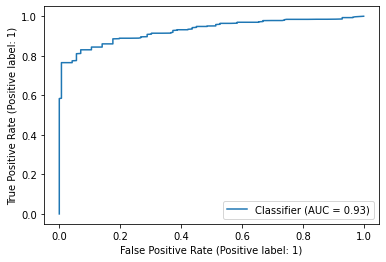

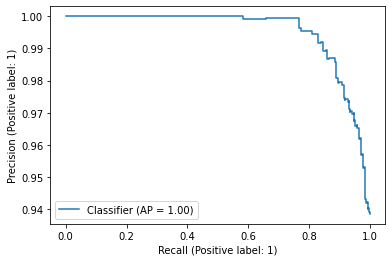

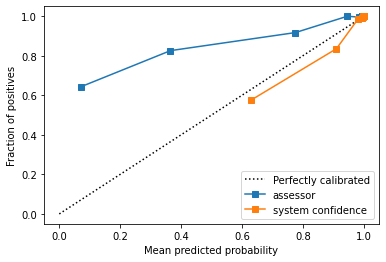

In [50]:
import sklearn.metrics as metrics
import sklearn.calibration as calibration


def metrics_for_threshold(df, threshold = 0.5):
    preds = df.asss_prediction.map(lambda p: p[0] > threshold)
    display(pd.crosstab(df.syst_pred_score, preds))
    print(classification_report(df.syst_pred_score, preds))
    display(f"Brier Score: {metrics.brier_score_loss(df.syst_pred_score, preds)}")

metrics_for_threshold(df, 0.50)
metrics.RocCurveDisplay.from_predictions(y_true=df.syst_pred_score, y_pred=df.asss_prediction.map(lambda p: p[0]))
metrics.PrecisionRecallDisplay.from_predictions(y_true=df.syst_pred_score, y_pred=df.asss_prediction.map(lambda p: p[0]))

cal = calibration.CalibrationDisplay.from_predictions(
    name="assessor",
    y_true=df.syst_pred_score,
    y_prob=df.asss_prediction.map(lambda p: p[0]),
    n_bins=10,
    strategy="quantile")
calibration.CalibrationDisplay.from_predictions(
    name="system confidence",
    ax=cal.ax_,
    n_bins=10,
    y_true=df.syst_pred_score,
    y_prob=df.syst_prediction.map(lambda p: np.max(p, axis=1)[0]),
    strategy="quantile"
)

def plot_thresholding(df):
    def metrics_for_threshold2(df, threshold):
        y_true = df.syst_pred_score
        y_pred = df.asss_prediction.map(lambda p: p[0] > threshold)
        return (
            metrics.accuracy_score(y_true, y_pred),
            metrics.precision_score(y_true, y_pred),
            metrics.recall_score(y_true, y_pred),
            metrics.balanced_accuracy_score(y_true, y_pred)
    )
    thresholds = np.arange(0, 1, 0.01)
    accuracies, precisions, recalls, bal_accs = zip(*[metrics_for_threshold2(df, t) for t in thresholds])
    fig = plt.figure()
    ax = plt.gca()
    # ax = fig.axes[0]
    ax.plot(thresholds, accuracies, label="accuracy")
    ax.plot(thresholds, precisions, label="precision")
    ax.plot(thresholds, recalls, label="recall")
    # ax.plot(thresholds, bal_accs, label="balanced accuracy")
    ax.set_xlabel("Threshold")
    ax.legend()
    return fig
    
    
# plot_thresholding(df)